In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ex1data2.txt', header = None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


1. Tambahkan kolom satu untuk istilah bias. Kita pilih 1 karena jika Anda mengalikan satu dengan nilai apa pun, nilai itu tidak berubah.

In [3]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,0,1,2
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


2. Tentukan variabel input atau variabel bebas X dan variabel keluaran atau variabel terikat y. Dalam dataset ini, kolom 0 dan 1 adalah variabel input dan kolom 2 adalah variabel output.

In [4]:
X = df.drop(columns=2)
y = df.iloc[:, 3]
X

,00,0,1
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4
5,1,1985,4
6,1,1534,3
7,1,1427,3
8,1,1380,3
9,1,1494,3


In [5]:
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: 2, dtype: int64

3. Normalisasikan variabel input dengan membagi setiap kolom dengan nilai maksimum kolom tersebut. Dengan begitu, nilai setiap kolom akan berada di antara 0 hingga 1. Langkah ini tidak penting. Tapi itu membuat algoritma untuk mencapai optimal lebih cepat. Juga, jika Anda melihat kumpulan data, elemen kolom 0 terlalu besar dibandingkan dengan elemen kolom 1. Jika Anda menormalkan kumpulan data, ini mencegah kolom satu menjadi terlalu mendominasi dalam algoritme.

In [6]:
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])
X.head()

,00,0,1
0,1,0.469853,0.6
1,1,0.357302,0.6
2,1,0.535954,0.6
3,1,0.316213,0.4
4,1,0.669942,0.8


4. Memulai nilai theta. Kita memulai mereka sebagai nol. Tapi nomor lain seharusnya baik-baik saja

In [7]:
theta = np.array([0]*len(X.columns))
#Output: array([0, 0, 0])

5. Hitung jumlah data latih/train yang dilambangkan sebagai m dalam rumus di atas:

In [16]:
m = len(df)
print (m)

47


6. Definisikan fungsi Hipotesa 

In [9]:
def hypothesis(theta, X):
    return theta*X

7. Tentukan fungsi cost menggunakan rumus fungsi cost yang dijelaskan di atas 

In [10]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1 = np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

8. Tulislah fungsi penurunan gradien (gradient descent). Fungsi ini akan mengambil X, y, theta, kecepatan pembelajaran (alfa dalam rumus), dan epoch (atau iterasi) sebagai input. Kita perlu terus memperbarui nilai theta sampai fungsi biaya mencapai minimum.

In [11]:
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

9. Gunakan fungsi penurunan gradien untuk mendapatkan final cost (biaya akhir) , daftar biaya di setiap iterasi, dan parameter theta yang dioptimalkan. Kita memilih alfa sebagai 0,05. Tetapi Anda dapat mencoba dengan beberapa nilai lain seperti 0,1, 0,01, 0,03, 0,3 untuk melihat apa yang terjadi. Kita menjalankannya selama 10.000 iterasi. Silakan coba dengan lebih banyak atau lebih sedikit iterasi untuk melihat perbedaannya.

In [17]:
iter_ = 10000
J, j, theta = gradientDescent(X, y, theta, 0.05, iter_)

10. Memprediksi output menggunakan theta yang dioptimalkan

In [18]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

11. Plot y asli dan output yang diprediksi 'y_hat'

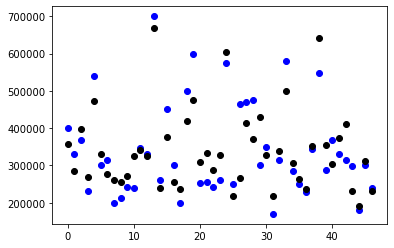

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 47)),y= y, color='blue')         
plt.scatter(x=list(range(0, 47)), y=y_hat, color='black')
plt.show()

Beberapa titik keluaran hampir overlapping (tumpang tindih) dengan keluaran yang diprediksi. Beberapa dekat tetapi tidak tumpang tindih.

12. Plot biaya setiap iterasi untuk melihat perilakunya

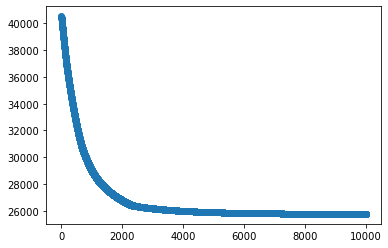

In [20]:
plt.figure()
plt.scatter(x=list(range(0, iter_)), y=J)
plt.show()